### [ ggplot2 ]
documentation
- http://docs.ggplot2.org/current/

cheat sheet
- https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

why ggplot2?
- fancy by default, good for demo and report 
- consistent across all kinds of plot in syntax and behavior
- strong support community(the mostly download package on CRAN)

In [2]:
library('ggplot2')

In [3]:
getwd()

[1] "/Users/YorkLin/lecture/riii/cb102"

In [4]:
setwd('/Users/YorkLin/lecture/riii')

In [5]:
load('./Statistics/cdc.Rdata')

In [6]:
str(cdc)

'data.frame':	20000 obs. of  9 variables:
 $ genhlth : Factor w/ 5 levels "excellent","very good",..: 3 3 3 3 2 2 2 2 3 3 ...
 $ exerany : num  0 0 1 1 0 1 1 0 0 1 ...
 $ hlthplan: num  1 1 1 1 1 1 1 1 1 1 ...
 $ smoke100: num  0 1 1 0 0 0 0 0 1 0 ...
 $ height  : num  70 64 60 66 61 64 71 67 65 70 ...
 $ weight  : int  175 125 105 132 150 114 194 170 150 180 ...
 $ wtdesire: int  175 115 105 124 130 114 185 160 130 170 ...
 $ age     : int  77 33 49 42 55 55 31 45 27 44 ...
 $ gender  : Factor w/ 2 levels "m","f": 1 2 2 2 2 2 1 1 2 1 ...


In [7]:
cdc$exerany = as.factor(cdc$exerany)
cdc$hlthplan = as.factor(cdc$hlthplan)
cdc$smoke100 = as.factor(cdc$smoke100)

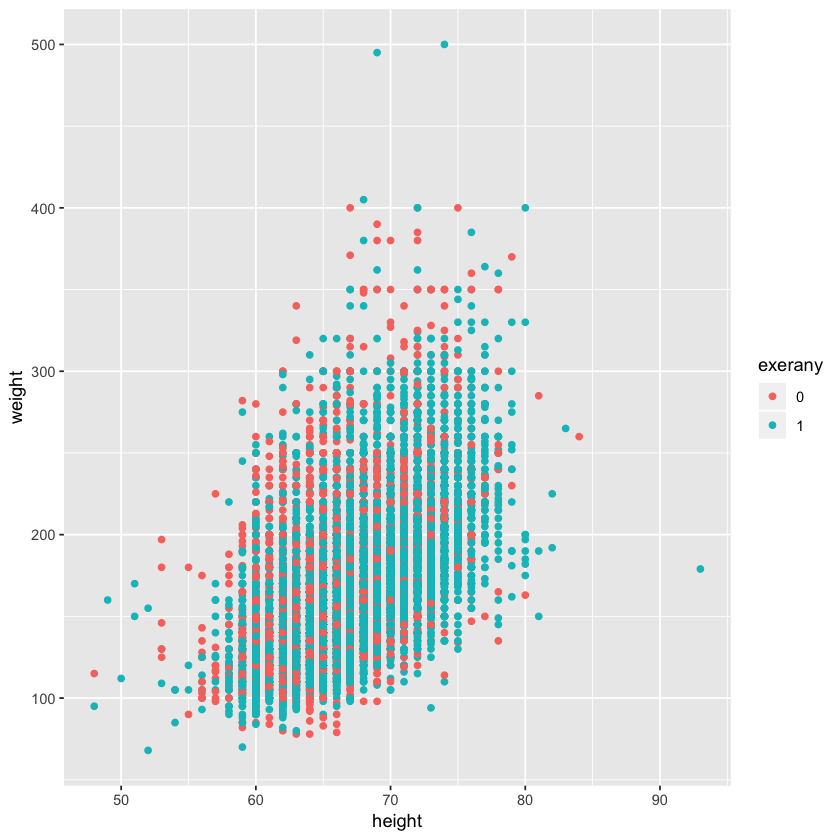

In [10]:
g = ggplot(cdc,aes(x=height,y=weight))
g+geom_point(aes(col=exerany))

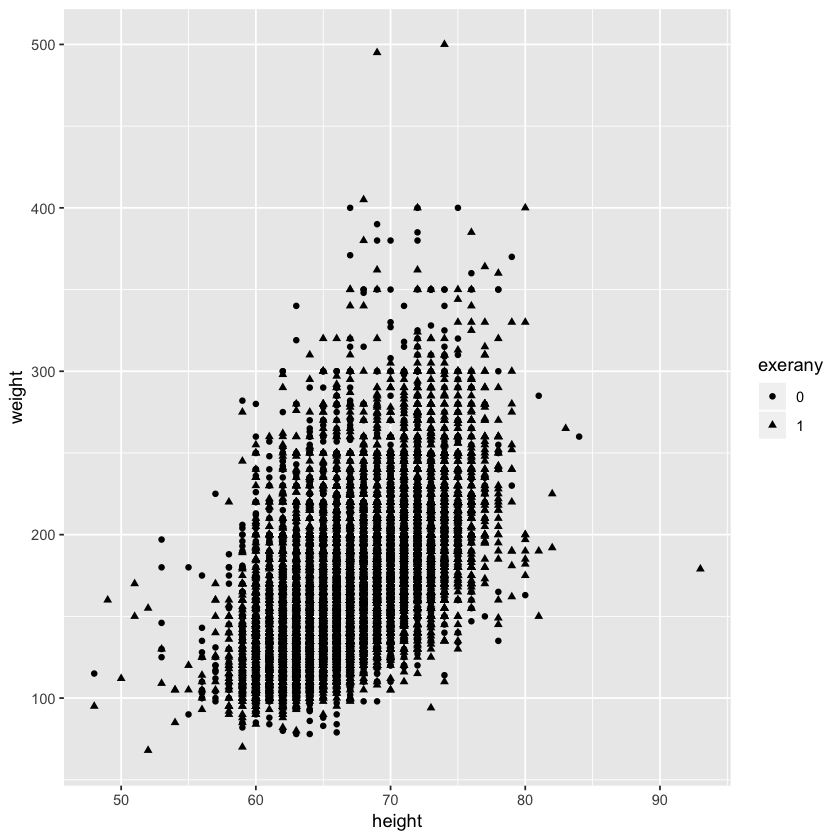

In [37]:
g = ggplot(cdc,aes(x=height,y=weight))
g+geom_point(aes(shape=exerany))

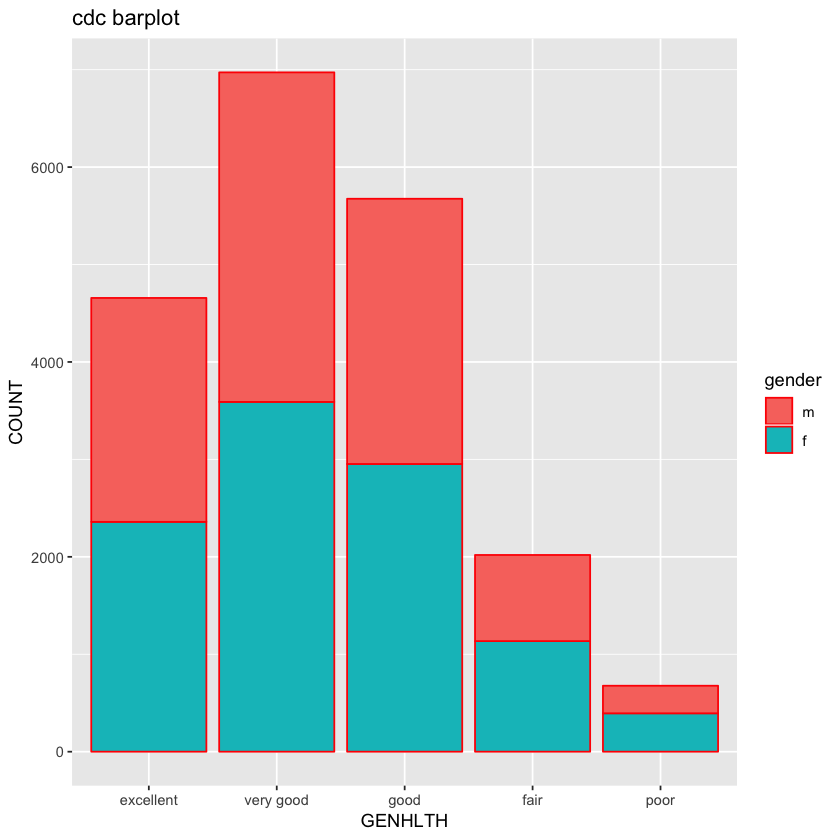

In [22]:
g= ggplot(cdc,aes(x=genhlth))
g+geom_bar(aes(fill=gender),color='red')+xlab('GENHLTH') + ylab('COUNT') + ggtitle("cdc barplot")

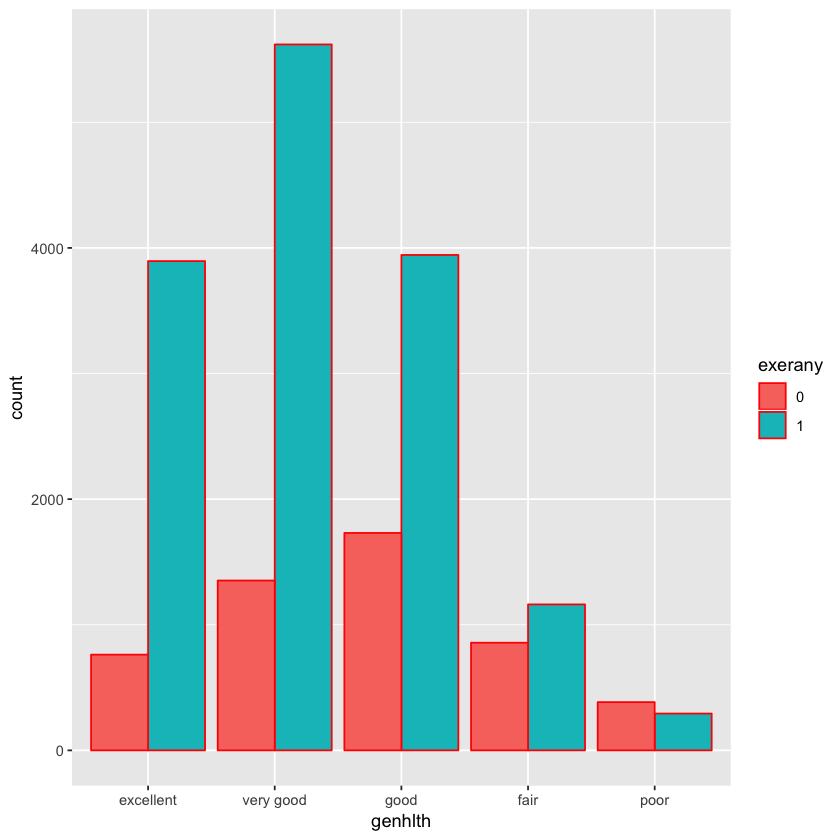

In [24]:
g+geom_bar(aes(fill=exerany),color='red',position='dodge')

In [31]:
df = as.data.frame(table(cdc$genhlth))
names(df) = c('genhlth','freq')

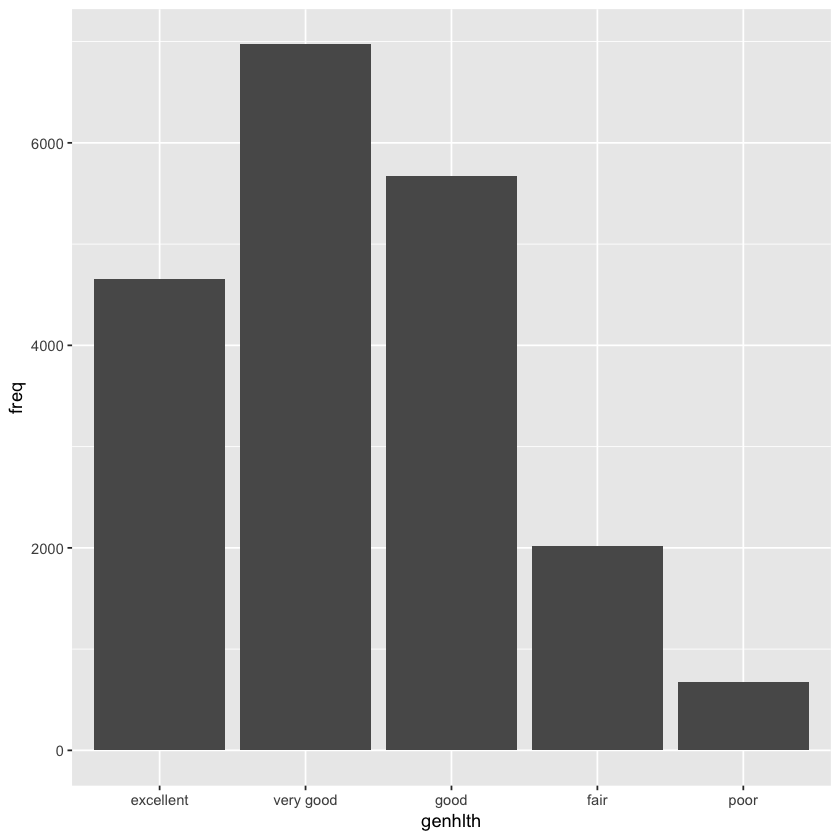

In [36]:
ggplot(df,aes(x=genhlth,y=freq)) + geom_bar(stat='identity')